# Import Necessary Modules

In [1]:
from skimage import io
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
img = io.imread("mountain-scenery-morning-sun-rays-4k-kf.jpg", as_gray=True)

In [4]:
from skimage.transform import rescale, resize, downscale_local_mean

In [7]:
rescaled_img = rescale(img, 1.0/4.0, anti_aliasing=True)
resized_img = resize(img, (200,200), anti_aliasing=True)
downscaled_img = downscale_local_mean(img, (4,3))

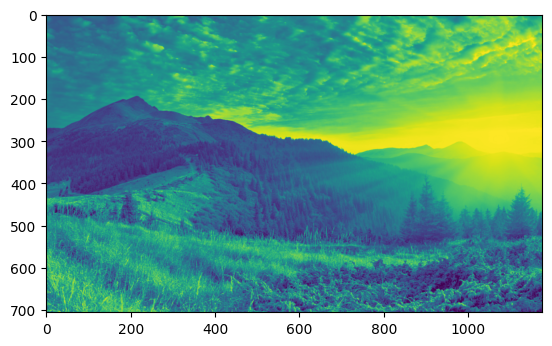

In [8]:
plt.imshow(rescaled_img)

In [10]:
from skimage.filters import roberts, sobel, scharr, prewitt

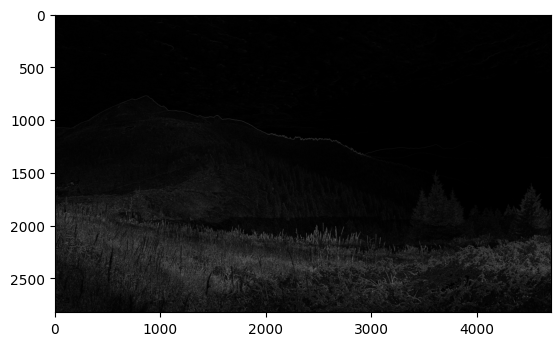

In [11]:
edge_roberts = roberts(img)
plt.imshow(edge_roberts, cmap='gray')

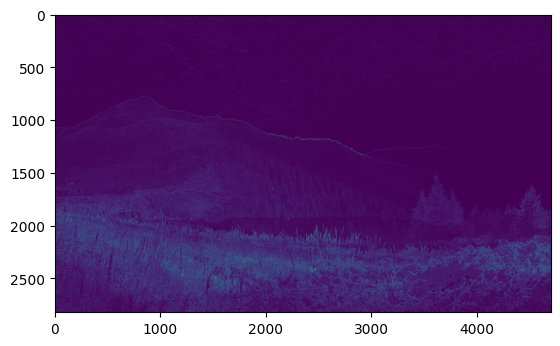

In [12]:
plt.imshow(edge_roberts)

# Edge Filtering

In [13]:
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

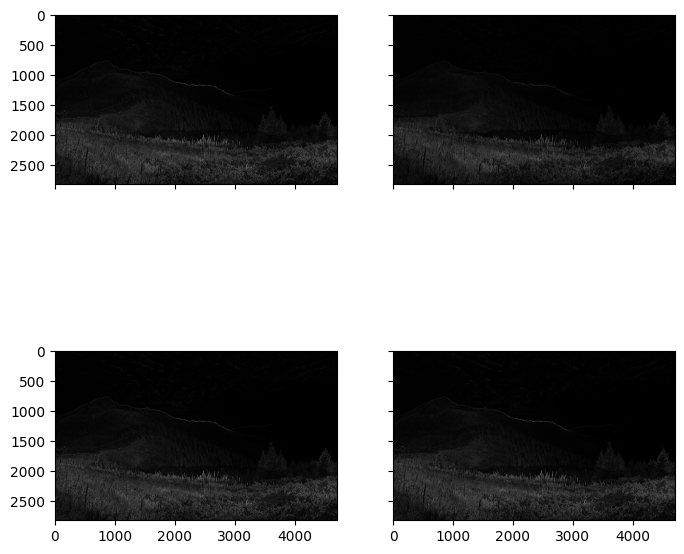

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax = axes.ravel()

ax[0].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[3].imshow(edge_scharr, cmap=plt.cm.gray)

# Canny Edge Detection

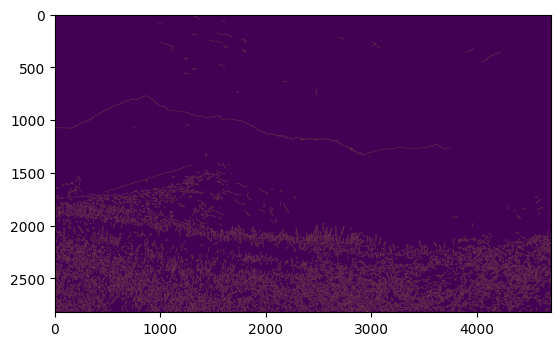

In [16]:
from skimage.feature import canny
edge_canny = canny(img, sigma=3)
plt.imshow(edge_canny)

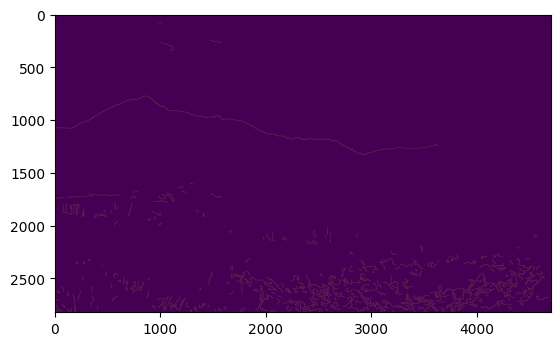

In [17]:
edge_canny5 = canny(img, sigma=5)
plt.imshow(edge_canny5)

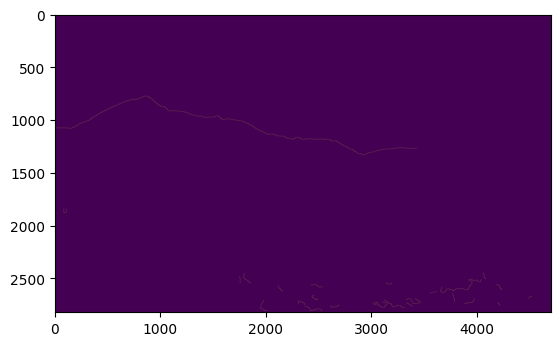

In [18]:
edge_canny7 = canny(img, sigma=7)
plt.imshow(edge_canny7)

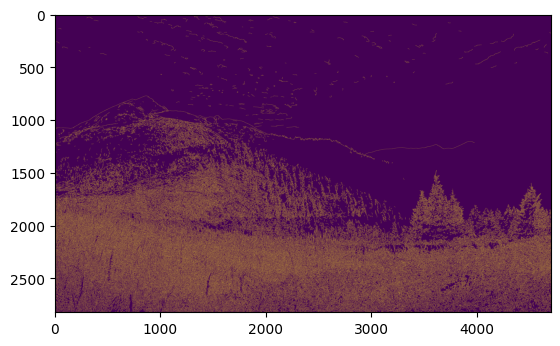

In [19]:
edge_canny1 = canny(img, sigma=1)
plt.imshow(edge_canny1)

# Deconvolution

In [21]:
from skimage import restoration
import numpy as np

In [23]:
psf = np.ones((3,3)) / 9
deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imsave("decovolved.jpg", deconvolved, cmap='gray')

# Point Spread Function

In [24]:
import scipy.stats as st

In [26]:
def gkern(kernlen=21, nsig=2):
    lim = kernlen//2 + (kernlen % 2)/2
    x = np.linspace(-lim, lim, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

In [27]:
psf = gkern(5,3)
print(psf)

[[0.003765   0.015019   0.02379159 0.015019   0.003765  ]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.02379159 0.0949073  0.15034262 0.0949073  0.02379159]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.003765   0.015019   0.02379159 0.015019   0.003765  ]]


In [28]:
deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imsave("decovolved2.jpg", deconvolved, cmap='gray')